<h3 style="color:#C0C0C0;text-align:center;font-size: smaller;">Applied Machine Learning and Data Mining - U26538</h3>

<br>
<h1 style="color:#800080;text-align:center;"> Practical Worksheet (10)</h1>
<h2 style="color:#800080;text-align:center;">Machine Learning Algorithm: K-Nearest Neighbour</h2>

<h3 b> Introduction </h3>

In the following practical worksheet, you will learn how to build a K-Nearest Neighbour Classifier model and visualize the results.
If you have any questions please ask for assistance during the session and you can also email me if you have any further questions <u> alaa.mohasseb@port.ac.uk</u>.

<u>Dataset</u>

In this practical exercise, we will use Iris dataset, The dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

https://archive.ics.uci.edu/ml/datasets/Iris

<u>Import the Libraries</u>

In a new Jupyter Notebook (practWeek9), load the NumPy, pandas and matplotlib libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#this will make your plot outputs appear and be stored within the notebook

<u>Read External Data</u> (Iris Dataset)
<ul>
<li>Download the dataset from your moodle page.</li>
<li>Upload the dataset to your Jupyter dashboard.</li>
<li>To read an external data (csv file) use the following command:</li>
</ul>

In [ ]:
iris = pd.read_csv("iris.csv")

In [ ]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<u>Data understanding and Exploration</u>

To understand the dataset, analysis should be done and some information needs to be explored such as:

- The Attributes
- Data Shape
- Data Description
- Data Information
- Data Type
- Data Visualization

In [ ]:
iris.keys() #Print the attributes

Index([u'sepal length', u'sepal width', u' petal length', u' petal width',
       u'class'],
      dtype='object')

In [ ]:
iris.describe() #Data description

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.dtypes #Data Type

sepal length     float64
sepal width      float64
 petal length    float64
 petal width     float64
class             object
dtype: object

In [ ]:
iris['class'].value_counts() #Print  Number of instances in the target (class) attribute

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

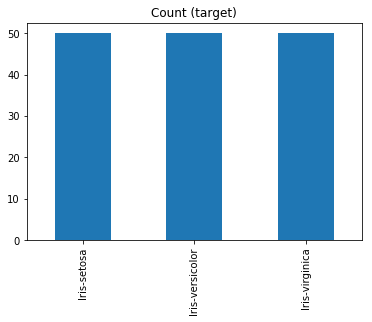

In [ ]:
#Visualize the number of instances in the target (class) attributes
iris['class'].value_counts().plot(kind='bar', title='Count (target)');

<u>Encoding the categorical data</u>

The <code>LabelEncoder</code> is used to convert any categorical data to numerical labels.

The <code>LabelEncoder</code> will be used to convert <u>Class</u> to the following values <i>setosa= 0</i>, <i>virginica= 1</i>,<i>verscicolor= 2</i>


In [ ]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
iris['class'] = LE.fit_transform(iris['class'])

In [ ]:
#To view the new dataset after encoding the categorical data
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris['class'].value_counts() #Print  Number of instances in the target (class) attribute

2    50
1    50
0    50
Name: class, dtype: int64

<u>Define the predictor and target attribute</u>

We will use all the attributes as our Predictor attributes which we call <code>"x"</code> and Purchased is the target attribute which we call <code>"y"</code>.

<i>The following means select all the predictor attributes (x) except the target (class) attributes (y)  which is always represented as (-1). </i>

In [ ]:
x = iris.iloc[:,:-1].values    # predictor attribute
y = iris.iloc[:,-1].values        # target attribute

In [ ]:
#To view the value of x
iris.iloc[:,:-1].values    # predictor attribute

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [ ]:
#To view the value of y
iris.iloc[:,-1].values        # target attribute

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<u>Another way to define the predictor attribute x and the target attribute y </u>

The following means select all the predictor attributes (x) except the target (class) attributes (y)  which is based on the given dataset is attribute number (4)

In [ ]:
X = iris.iloc[:,:4].values    # predictor attribute
y = iris.iloc[:,4].values        # target attribute

<u>Train/Test the data </u>

The dataset will be split into a test set and a train set. A 75% dataset is split for training and the remaining 25% for tests.

<b>Note:</b> <code>random_state=0</code>


- If you don't mention the random_state in the code, then whenever you execute your code a new random value is generated and the train and test datasets would have different values each time.

- However, if you use a particular value for random_state(random_state = 0 or any other value) everytime the result will be same,i.e, same values in train and test datasets.

In [ ]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state=0)

<u>Feature Scaling</u>

Since some attributes in the dataset (age and estimated salary) contains information in Numeric value, and some value is very high and some are very low, this will cause some issues when building the model, to solve that problem all values must be set on the same scale. There are two methods to solve that problem:

- Normalization
- Standard Scaler

In this pracatical Standard Scaler will be used

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

<u>Build the Machine learning Model</u>

KNN Classifier will be imporetd using Scikit Learn Library.

In [ ]:
# import support vector machine from scikit learn
from sklearn.neighbors import KNeighborsClassifier

<u>Initialize the KNN model</u>

In this step, KNN model will be initialized. The value of <code>K</code> will be set to 5. The nearest neighbour metric = <code>Euclidean distance</code> with power 2.

<b>Note:</b> <code>minkowski</code> = distance formula and p=2 power 2 of distance formula

In [ ]:
# init the KNN model
knn= KNeighborsClassifier(n_neighbors=5 , metric= 'minkowski', p=2)

<u>Fitting the KNN Model</u>

In this step, the training data will be fitted into the model x_train, y_train is the training data.

In [ ]:
#fit the KNN Model
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

<u>Model Predicttion</u>

In [ ]:
#result
y_pred=knn.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

<u>Confusion Matrix</u>

In this step, confusion metric will be used to display the result, to do that confusion matrix will be imported from sklearn.metrics then two parameters will be passed first is the <code> y_test </code> which is the actual test set result and second is <code>y_pred</code> which is the predicted result.

In [ ]:
# print the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 14,  2],
       [ 0,  0,  9]])

<u>Print the Confusion Matrix using a heatmap visualization</u>

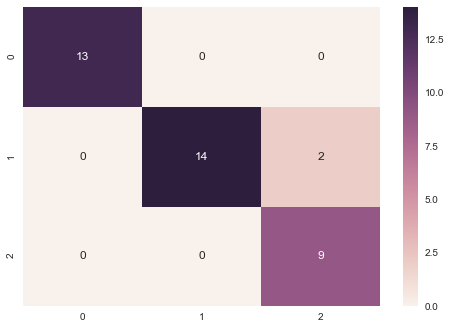

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

<u>Print confusion Matrix as DataFrame</u>

In [ ]:
from sklearn.metrics import confusion_matrix
unique_label = np.unique([y_test, y_pred])
cm=confusion_matrix(y_test, y_pred, labels=unique_label )
pd.DataFrame(cm,  columns=unique_label)

,0,1,2
0,13,0,0
1,0,14,2
2,0,0,9


<u>Print the full results report</u>

In this report:

- The precision, recall, f1-score and support will be printed
- The columns will show the instances predicted for each label,
- The rows will show the actual number of instances for each label.

In [ ]:
from sklearn import metrics
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.88      0.93        16
          2       0.82      1.00      0.90         9

avg / total       0.96      0.95      0.95        38



<u> More detailed results report</u>

The following report will display more detailed and more metrics

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]
('Mean Absolute Error:', 0.052631578947368418)
('Mean Squared Error:', 0.052631578947368418)
('Root Mean Squared Error:', 0.22941573387056177)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.88      0.93        16
          2       0.82      1.00      0.90         9

avg / total       0.96      0.95      0.95        38

('Accuracy:', 0.94736842105263153)


<u> Accuracy Score</u>

In this step, the accuracy is calculated  based on the actual test results and the predicted test results.

In [ ]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred)
ac*100

94.73684210526315

OR

In [ ]:
import sklearn.metrics as metrics
ac=accuracy_score(y_test, y_pred)
ac*100

94.73684210526315

<b>Try displaying the results using other evaluation metrics then use cross-validation and print the results.</b>

<u>Find a better value for K</u>

In [ ]:
# try K=1 through K=5 and record testing accuracy
k_range = range(1, 10)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.81578947368421051, 0.89473684210526316, 0.89473684210526316, 0.94736842105263153, 0.94736842105263153, 0.94736842105263153, 0.94736842105263153, 0.94736842105263153, 0.92105263157894735]


Text(0,0.5,'Testing Accuracy')

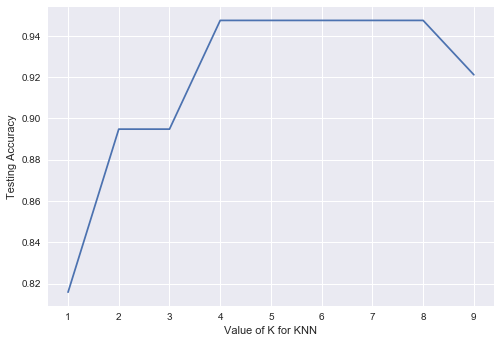

In [ ]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')